# Comparing the X-ray upper limit of GLEAMX J162759.5-523504.3 to known magnetars
[Hurley-Walker et al.]()

Based on the X-ray limits derived from the Swift/XRT observations, we consider detector response matrix and perform simulations (using [PIMMS](https://heasarc.gsfc.nasa.gov/docs/software/tools/pimms.html)) to compare the constraints with known quiescent magnetars (based on the [McGill Online Magnetar Catalog](http://www.physics.mcgill.ca/~pulsar/magnetar/main.html)).

In [1]:
import os, pickle
import numpy as np
from astropy.io import fits, ascii
from astropy.time import Time
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)
%matplotlib inline

In [3]:
quiescent_magnetars = ascii.read('http://www.physics.mcgill.ca/~pulsar/magnetar/TabO1.csv')
# In case the online catalog is unaccessible - an offline copy is kept in this folder
#quiescent_magnetars = ascii.read('McGill_magnetar_catalog.csv')

/home/arash/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/arash/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/arash/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:825: UserWarning: Warning: converting a masked element to nan.
  y = float(self.convert_yunits(self._y))
/home/arash/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:685: UserWarning: Warning: converting a masked element to nan.
  posy = float(textobj.convert_yunits(textobj._y))
posx and posy should be finite values
/home/arash/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:825: UserWarning: Warning: converting a masked element to nan.
  y = float(self.convert_yunits(self._y))
/home/arash/anaconda3/lib/python3.8

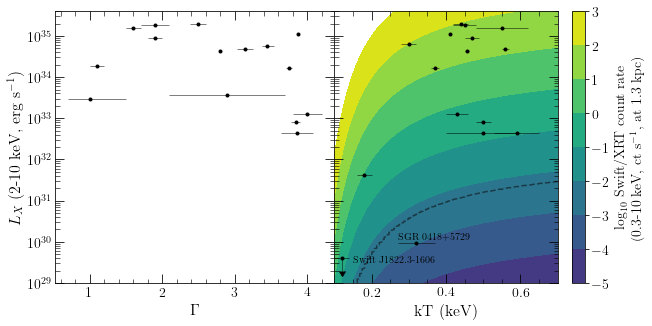

In [4]:
kT_range = np.linspace(0.05,0.7,100)
Lx_range = np.logspace(29,35.6,500)

infile = open('pimms_sim_2e21.pickle','rb')
rate_matrix_nh2e21 = pickle.load(infile)
infile.close()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.errorbar(quiescent_magnetars['Gamma'],quiescent_magnetars['Lumin'],
            xerr=[quiescent_magnetars['Gamma_EDn'],quiescent_magnetars['Gamma_EUp']],
            fmt='.',color='k',elinewidth=0.5)

ax.set_ylim(1e29,4e35)
ax.set_yscale('log')

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='major', length=9)
ax.tick_params(axis='both', which='minor', length=4.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

ax.set_xlabel('$\Gamma$', fontsize=16)
ax.set_ylabel('$L_X$ (2-10 keV, erg s$^{-1}$)', fontsize=16)

ax = fig.add_subplot(1,2,2)


ctr = ax.contourf(kT_range,Lx_range,np.log10(rate_matrix_nh2e21),cmap='viridis',
                  levels=np.linspace(-5,3,9), vmin=-6)
cbar = plt.colorbar(ctr, ax=ax)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)
cbar.ax.set_ylabel('$\log_{10}$ Swift/XRT count rate\n(0.3-10 keV, ct s$^{-1}$, at 1.3 kpc)',fontsize=14)

ctrblocked = ax.contour(kT_range,Lx_range,(rate_matrix_nh2e21>=5.6106e-03),
                        cmap='hot',vmin=5.6106e-03, vmax=5.6106e-03, levels=[5.6106e-03],alpha=0.5,linestyles='--')


ax.errorbar(quiescent_magnetars['kT'],quiescent_magnetars['Lumin'],
            xerr=[quiescent_magnetars['kT_EDn'],quiescent_magnetars['kT_EUp']],
            fmt='.',color='k',elinewidth=0.5)


ax.errorbar(quiescent_magnetars[(~quiescent_magnetars['kT'].mask) & (~quiescent_magnetars['Lumin_lim'].mask)]['kT'],
            quiescent_magnetars[(~quiescent_magnetars['kT'].mask) & (~quiescent_magnetars['Lumin_lim'].mask)]['Lumin'],
            yerr = 0.5*quiescent_magnetars[(~quiescent_magnetars['kT'].mask) & (~quiescent_magnetars['Lumin_lim'].mask)]['Lumin'],
            fmt='.',ms=0,color='k',elinewidth=0.5,uplims=True)


labeled = quiescent_magnetars[(quiescent_magnetars['Lumin']<2e30) & (~quiescent_magnetars['kT'].mask)]['Name','kT','Lumin']
for src in labeled:
    if src['Name'] == 'SGR 0418+5729':
        ax.text(src['kT']-0.05,src['Lumin']*1.2,src['Name'])
    else:
        ax.text(src['kT']+0.03,src['Lumin']*0.8,src['Name'])
        


ax.set_xlim(0.1,0.7)
ax.set_ylim(1e29,4e35)
ax.set_yscale('log')
ax.set_yticklabels([])
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='major', length=9)
ax.tick_params(axis='both', which='minor', length=4.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

ax.set_xlabel('kT (keV)', fontsize=16);
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)

fig.savefig('magnetar_comparison.pdf',bbox_inches='tight')